In [68]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)


In [69]:
#You could have divided the above by 18 or multiplied by 99.
#It is just a distance.
#Just like inches can be converted to cm by just mmultipliying a factor,
#any number can be the divisor or multiplier. 
#HOWEVER, the largest error obtained due to a certain distribution, (seen later)
#is why the formula with 2 as a divisor makes sense. 

In [70]:
#Total Variation Distance

In [71]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2))/2

In [72]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


In [73]:
eligible_population = jury.column('Eligible')

In [74]:
sample_proportions(1453, eligible_population)

array([0.14384033, 0.18444597, 0.54507915, 0.11906401, 0.00757054])

In [75]:
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.156917
Black/AA,0.18,0.08,0.179628
Caucasian,0.54,0.54,0.518926
Hispanic,0.12,0.08,0.134205
Other,0.01,0.04,0.0103235


In [76]:
panels = jury.column('Panels')
total_variation_distance(panels, eligible_population)

0.14

## Simulating TVD Under the Model of Random Selection

In [77]:
#Looks at one random sample, looks at the distribution, 
#finds the distance and 
#1453 is the sample size to be drawn from the population

In [78]:
def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)

In [79]:
one_simulated_tvd()

0.02030970406056438

In [80]:
#Find a lot of these distances i.e. run this multiple times 
#Put them in an array

In [81]:
tvds = make_array()
num_simulations = 10000
for i in np.arange(num_simulations):
    tvds = np.append(tvds, one_simulated_tvd())

In [82]:
#Don't look at the 10000 numbers, visualize them

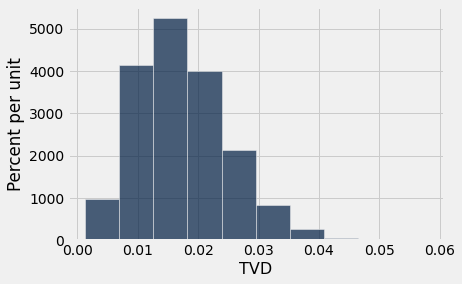

In [83]:
Table().with_column('TVD', tvds).hist()

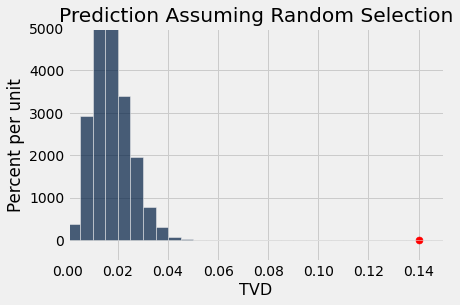

In [84]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

#Plotting parameters
plt.title('Prediction Assuming Random Selection')
plt.xlim(0, 0.15)
plt.ylim(-5, 50)
plt.scatter(0.14, 0, color='red', s=50)

In [85]:
#Who might not be on the list
#No drivers-license
#No ID Cards

In [86]:
#Random samples can turn out quite extreme. It is unlikely, but possible.
#Data has to be inclusive of all.
#Only then will a sample be inclusive of all.
#Always try to measure to error

## Testing of Hypotheses (ses for plural)

In [87]:
#Purple or White Plants

In [88]:
#Mendel's model

In [89]:
#Each plant is purple-flowering with 75% chance
#Regardless of the colors of the other plants


In [90]:
#QUESTION
#Is the model good or not

In [91]:
#Model for [purple, white]
#Draws at random with replacement from

mendel_proportions = [0.75, .25]

In [92]:
#Mendel's data

sample_size = 929
observed_count = 705   #Purple flowering
observed_percent = 100 * observed_count / sample_size

In [93]:
observed_percent

75.8880516684607

In [94]:
#Can you have a difference that is greater than 0.8?

In [95]:
#HYPOTHESES

In [96]:
#Null Hypothesis
    #Nothing is going on. Everything is based on chance!
    #A well defined chance model about how the data were generated
    #CHANCE MODEL
    #We can simulate data under the assumptions of this model-
    #"under the null hypothesis"
    

In [97]:
    #In Mendel's context, the null hypothesis is...
        #Mendel's model is good: the plants are like draws at random
        #with replacement from the distribution [0.75, 0.25]

In [98]:
#Alternative Hypothesis
    #Model NOT Good
    #Mendel's model isn't good.
#No reason. It is just saying that it is not good.

## Test Statistic

In [99]:
#The statistic that we choose to simulate, to decide between two hypotheses

In [100]:
#QUESTIONS BEFORE CHOOSING THE STATISTIC

In [101]:
#What values of the statistic will make us lean towards the null hypothesis?
#What values of the statistic will make us lean towards the other?

In [102]:
#Preferably, the answer should be just "high" or just "low"
#TRY TO AVOID "both high and low"

In [103]:
#Start with percent of purp
#If that percent is much larger or much smaller than 75,
#that is evidence against the model.

In [104]:
#Statistic
# |sample percent of purple-flowering plants - 75|

In [105]:
observed_distance = abs(observed_percent - 75)
observed_distance

0.8880516684607045

In [113]:
#Sampling under the null hypothesis
sample_proportions(sample_size, mendel_proportions)

#Sampling (sample_size) number of samples from mendel_proportions
#sample_proportion(constant, (where to sample))

0.7265877287405813

## Predicting the Test Statistic Under the Null 

In [114]:
#Simulate one value of the test statistic
#Under the null hypothesis

def one_simulated_distance():
    sample_percent = 100 * sample_proportions(sample_size, mendel_proportions)[0]
    return abs(sample_percent - 75)

In [120]:
one_simulated_distance()

1.7491926803014053

In [117]:
num_simulations = 10000
distances = make_array()

for i in np.arange(num_simulations):
    distances = np.append(distances, one_simulated_distance())

In [124]:
mendel_simulations = Table().with_columns('Distance between sample % and 75%', distances)

Text(0.5, 1.0, 'Prediction Made by the Null Hypothesis')

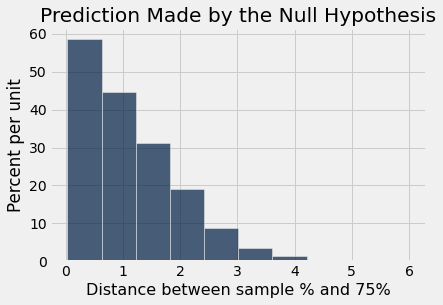

In [130]:
mendel_simulations.hist()
plt.title('Prediction Made by the Null Hypothesis')

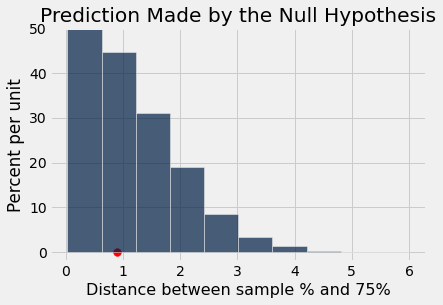

In [132]:
mendel_simulations.hist()
plt.ylim(-0.02, 0.5)
plt.title('Prediction Made by the Null Hypothesis')
plt.scatter(observed_distance, 0, color='red', s=60)

In [133]:
#Conclusion of the test

In [134]:
#Resolve the choice between the null and alternative

In [135]:
#Compare the observed test statistic and its empirical distribution under the null hypothesis

In [136]:
    #If the observed value is not consistent with the distribution,
    #then the test favors the alternative - "rejects the null hypothesis"

In [138]:
#Whether a value is consistent with a distribution:
    #A visualization may be sufficient
    #if not,
        #there are conventions about "consistency"

In [139]:
#Meaning of "NOT CONSISTENT"

In [140]:
#Based on Tail Area

In [141]:
#Start at the observed value of the test statistic 
#Look in the direction that favors the alternative hypothesis

In [142]:
        #If the tail is small, the data are not consistent with the null
        #if not, data are not consistent with the null
#Testing whether or not Mendel's model is good:
    #Large values of the distance favor the alternative

In [143]:
#CONVENTION
#YOU CAN MAKE A JUDGEMENT WITHOUT THESE

In [144]:
#"Inconsistency"

#"In the tail" first convention
#The area in the tail is less than 5%
#The result is "statistically significant"

#"In the tail" second convention
#The area in the tail is less than 1%
#The result is "highly statistically significant"


In [ ]:
#Or you can let the audience decide just based on the data